# Simple linear regression on predicting salary using years of experience

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sal = pd.read_csv('Salary_Data.csv')
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


(30, 1)
(30, 1)


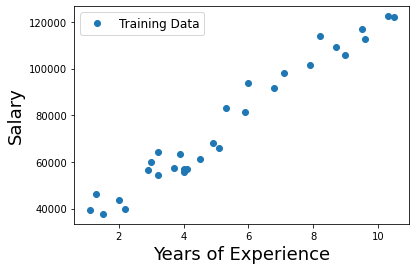

In [2]:
years = sal['YearsExperience']
salary = sal['Salary']

x = np.array(years, ndmin=2).T
y = np.array(salary, ndmin=2).T

print(x.shape)
print(y.shape)

plt.plot(x, y, 'o', label="Training Data")
plt.xlabel("Years of Experience", fontsize=18)
plt.ylabel("Salary", fontsize=18)
plt.legend(fontsize=12)
plt.show()

## Linear model
Design matrix will include a column with the predictors and label, we will have 2 parameters ( 𝑤0 ,  𝑤1)

The design matrix is:
 [[ 1.   1.1]
 [ 1.   1.3]
 [ 1.   1.5]
 [ 1.   2. ]
 [ 1.   2.2]
 [ 1.   2.9]
 [ 1.   3. ]
 [ 1.   3.2]
 [ 1.   3.2]
 [ 1.   3.7]
 [ 1.   3.9]
 [ 1.   4. ]
 [ 1.   4. ]
 [ 1.   4.1]
 [ 1.   4.5]
 [ 1.   4.9]
 [ 1.   5.1]
 [ 1.   5.3]
 [ 1.   5.9]
 [ 1.   6. ]
 [ 1.   6.8]
 [ 1.   7.1]
 [ 1.   7.9]
 [ 1.   8.2]
 [ 1.   8.7]
 [ 1.   9. ]
 [ 1.   9.5]
 [ 1.   9.6]
 [ 1.  10.3]
 [ 1.  10.5]]
The 2 parameters of the least squares linear solution are
 [[25792.20019867]
 [ 9449.96232146]]
Shape of w vector is: (2, 1)


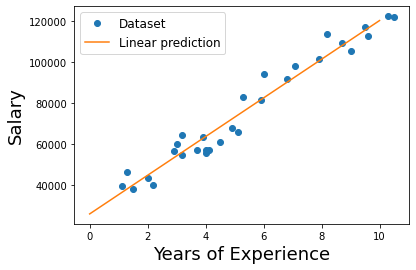

In [3]:
X = np.column_stack([np.ones(x.shape), x])   
print("The design matrix is:\n", X)

XTX = np.dot(X.T, X) # Step 1
XTX_inv = np.linalg.inv(XTX) # Step 2
XTX_invXT = np.dot(XTX_inv, X.T) # Step 3

w = np.dot(XTX_invXT, y)
print("The 2 parameters of the least squares linear solution are\n", w)

x_LS = np.linspace(0,10,100).T
X_LS = np.column_stack([np.ones(x_LS.shape), x_LS])
y_LS = np.dot(X_LS, w)
print('Shape of w vector is:', w.shape)

plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Linear prediction")
plt.xlabel("Years of Experience", fontsize=18)
plt.ylabel("Salary", fontsize=18)
plt.legend(fontsize=12)
plt.show()

## Quadratic model
Design matrix will include a new column with the squares of the predictors and instead of 2, we will have 3 parameters ( 𝑤0 ,  𝑤1  and  𝑤2 )

The design matrix is:
 [[  1.     1.1    1.21]
 [  1.     1.3    1.69]
 [  1.     1.5    2.25]
 [  1.     2.     4.  ]
 [  1.     2.2    4.84]
 [  1.     2.9    8.41]
 [  1.     3.     9.  ]
 [  1.     3.2   10.24]
 [  1.     3.2   10.24]
 [  1.     3.7   13.69]
 [  1.     3.9   15.21]
 [  1.     4.    16.  ]
 [  1.     4.    16.  ]
 [  1.     4.1   16.81]
 [  1.     4.5   20.25]
 [  1.     4.9   24.01]
 [  1.     5.1   26.01]
 [  1.     5.3   28.09]
 [  1.     5.9   34.81]
 [  1.     6.    36.  ]
 [  1.     6.8   46.24]
 [  1.     7.1   50.41]
 [  1.     7.9   62.41]
 [  1.     8.2   67.24]
 [  1.     8.7   75.69]
 [  1.     9.    81.  ]
 [  1.     9.5   90.25]
 [  1.     9.6   92.16]
 [  1.    10.3  106.09]
 [  1.    10.5  110.25]]
The 3 parameters of the least squares quadratic solution are
 [[2.62149327e+04]
 [9.25928389e+03]
 [1.63925663e+01]]
Shape of w vector is: (3, 1)


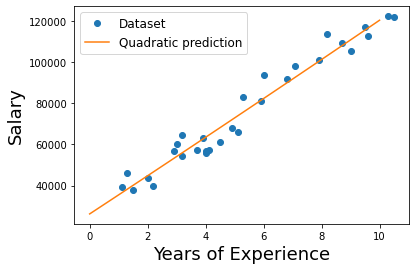

In [4]:
X = np.column_stack([np.ones(x.shape), x, x**2]) # Note we are including powers up to 2, the square of the predictors
print("The design matrix is:\n", X)

XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTX_invXT = np.dot(XTX_inv, X.T)

w = np.dot(XTX_invXT, y)
print("The 3 parameters of the least squares quadratic solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2])
y_LS = np.dot(X_LS, w)
print('Shape of w vector is:', w.shape)

plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Quadratic prediction")
plt.xlabel("Years of Experience", fontsize=18)
plt.ylabel("Salary", fontsize=18)
plt.legend(fontsize=12)
plt.show()

## Cubic model
Design matrix will include a new column with the cubes of the predictors and we will have 4 parameters (𝑤0 ,  𝑤1,  𝑤2 and 𝑤3)

The design matrix is:
 [[1.000000e+00 1.100000e+00 1.210000e+00 1.331000e+00]
 [1.000000e+00 1.300000e+00 1.690000e+00 2.197000e+00]
 [1.000000e+00 1.500000e+00 2.250000e+00 3.375000e+00]
 [1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00]
 [1.000000e+00 2.200000e+00 4.840000e+00 1.064800e+01]
 [1.000000e+00 2.900000e+00 8.410000e+00 2.438900e+01]
 [1.000000e+00 3.000000e+00 9.000000e+00 2.700000e+01]
 [1.000000e+00 3.200000e+00 1.024000e+01 3.276800e+01]
 [1.000000e+00 3.200000e+00 1.024000e+01 3.276800e+01]
 [1.000000e+00 3.700000e+00 1.369000e+01 5.065300e+01]
 [1.000000e+00 3.900000e+00 1.521000e+01 5.931900e+01]
 [1.000000e+00 4.000000e+00 1.600000e+01 6.400000e+01]
 [1.000000e+00 4.000000e+00 1.600000e+01 6.400000e+01]
 [1.000000e+00 4.100000e+00 1.681000e+01 6.892100e+01]
 [1.000000e+00 4.500000e+00 2.025000e+01 9.112500e+01]
 [1.000000e+00 4.900000e+00 2.401000e+01 1.176490e+02]
 [1.000000e+00 5.100000e+00 2.601000e+01 1.326510e+02]
 [1.000000e+00 5.300000e+00 2.809000e+01 1

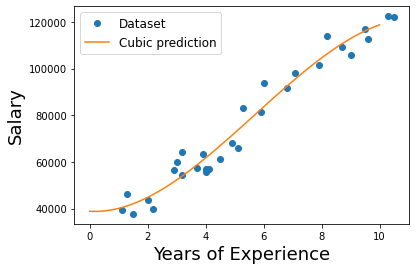

In [5]:
X = np.column_stack([np.ones(x.shape), x, x**2, x**3]) # Note we are including powers up to 3, the cube of the predictors
print("The design matrix is:\n", X)

XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTX_invXT = np.dot(XTX_inv, X.T)

w = np.dot(XTX_invXT, y)
print("The 4 parameters of the least squares cubic solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3])
y_LS = np.dot(X_LS, w)
print('Shape of w vector is:', w.shape)

plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Cubic prediction")
plt.xlabel("Years of Experience", fontsize=18)
plt.ylabel("Salary", fontsize=18)
plt.legend(fontsize=12)
plt.show()

## Polynomial model of degree 4
Design matrix will include a new column with the 4th degree of predictors and we will have 5 parameters (𝑤0 ,  𝑤1,  𝑤2, 𝑤3 and 𝑤4)

The design matrix is:
 [[1.00000000e+00 1.10000000e+00 1.21000000e+00 1.33100000e+00
  1.46410000e+00]
 [1.00000000e+00 1.30000000e+00 1.69000000e+00 2.19700000e+00
  2.85610000e+00]
 [1.00000000e+00 1.50000000e+00 2.25000000e+00 3.37500000e+00
  5.06250000e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01]
 [1.00000000e+00 2.20000000e+00 4.84000000e+00 1.06480000e+01
  2.34256000e+01]
 [1.00000000e+00 2.90000000e+00 8.41000000e+00 2.43890000e+01
  7.07281000e+01]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01]
 [1.00000000e+00 3.20000000e+00 1.02400000e+01 3.27680000e+01
  1.04857600e+02]
 [1.00000000e+00 3.20000000e+00 1.02400000e+01 3.27680000e+01
  1.04857600e+02]
 [1.00000000e+00 3.70000000e+00 1.36900000e+01 5.06530000e+01
  1.87416100e+02]
 [1.00000000e+00 3.90000000e+00 1.52100000e+01 5.93190000e+01
  2.31344100e+02]
 [1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
  2.56000000e+02]
 [1.00000000e+00 

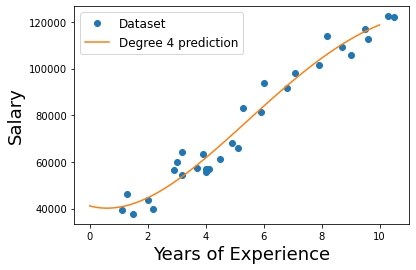

In [6]:
X = np.column_stack([np.ones(x.shape), x, x**2, x**3, x**4]) # Note we are including powers up to 4!
print("The design matrix is:\n", X)

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)                         # Here they have calculated XTX_invXT in a single step
print("The 5 parameters of the least squares 4-degree solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3, x_LS**4])
y_LS = np.dot(X_LS, w)
print('Shape of w vector is:', w.shape)

plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Degree 4 prediction")
plt.xlabel("Years of Experience", fontsize=18)
plt.ylabel("Salary", fontsize=18)
plt.legend(fontsize=12)
plt.show()